In [1]:
# Install and Import Libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
def create_stock_prediction(ticker, n, train_size=0.9):
    # Get the historical data for the specified ticker
    data = yf.download(ticker)

    # Prepare the data for LSTM
    dataset = data["Close"].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split the data into training and testing sets
    train_size = int(len(scaled_data) * train_size)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    # Create the training data sequences and their corresponding labels
    def create_sequences(data, sequence_length):
        X = []
        y = []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i+sequence_length])
            y.append(data[i+sequence_length])
        return np.array(X), np.array(y)

    sequence_length = 75
    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Update input_shape
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Inverse scale the predictions
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    # Calculate the mean squared error (MSE)
    mse = np.mean((predictions - y_test)**2)
    print("Mean Squared Error:", mse)

    # Convert the predictions and actual values to DataFrames with dates as index
    prediction_dates = data.index[train_size + sequence_length:]
    predictions_df = pd.DataFrame(predictions, index=prediction_dates, columns=["Prediction"])
    y_test_df = pd.DataFrame(y_test, index=prediction_dates, columns=["Actual"])

    # Function to plot the results
    def plot_predictions(prediction_dates, predictions, actual_values, n):
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.plot(prediction_dates, predictions, label='Predictions')
        plt.plot(prediction_dates, actual_values, label='Actual Values')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Stock Price Predictions')
        plt.grid(True)
        plt.legend()

    plot_predictions(prediction_dates, predictions, y_test, n)

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
300/300 [==============================] - 41s 75ms/step - loss: 8.3913e-05
Epoch 2/10
300/300 [==============================] - 24s 81ms/step - loss: 8.3391e-06
Epoch 3/10
300/300 [==============================] - 23s 76ms/step - loss: 8.1625e-06
Epoch 4/10
300/300 [==============================] - 24s 80ms/step - loss: 7.8321e-06
Epoch 5/10
300/300 [==============================] - 24s 80ms/step - loss: 6.6538e-06
Epoch 6/10
300/300 [==============================] - 25s 84ms/step - loss: 8.2902e-06
Epoch 7/10
300/300 [==============================] - 24s 78ms/step - loss: 7.1279e-06
Epoch 8/10
300/300 [==============================] - 22s 74ms/step - loss: 5.6155e-06
Epoch 9/10
300/300 [==============================] - 23s 76ms/step - loss: 5.2168e-06
Epoch 10/10
32/32 [==============================] - 1s 20ms/step
Mean Squared Error: 13.54334428911641


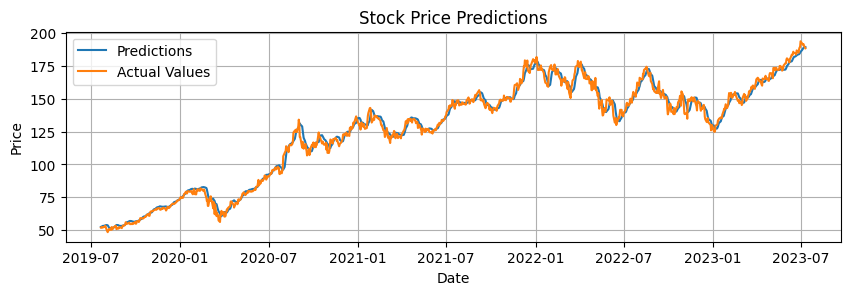

In [3]:
# Example usage
create_stock_prediction("AAPL", 15)

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
263/263 [==============================] - 25s 76ms/step - loss: 1.6487e-04
Epoch 2/10
263/263 [==============================] - 21s 78ms/step - loss: 1.8179e-05
Epoch 3/10
263/263 [==============================] - 19s 74ms/step - loss: 1.8201e-05
Epoch 4/10
263/263 [==============================] - 21s 78ms/step - loss: 1.5771e-05
Epoch 5/10
263/263 [==============================] - 19s 74ms/step - loss: 1.5764e-05
Epoch 6/10
263/263 [==============================] - 21s 79ms/step - loss: 1.4788e-05
Epoch 7/10
263/263 [==============================] - 20s 78ms/step - loss: 1.3420e-05
Epoch 8/10
263/263 [==============================] - 21s 81ms/step - loss: 1.2202e-05
Epoch 9/10
263/263 [==============================] - 21s 80ms/step - loss: 1.2289e-05
Epoch 10/10
28/28 [==============================] - 2s 30ms/step
Mean Squared Error: 91.37923061561837


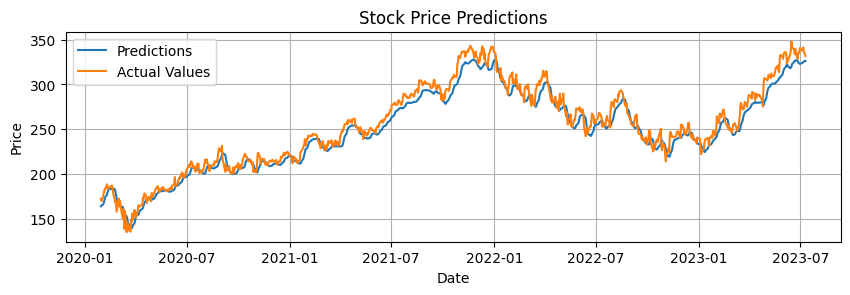

In [4]:
# Example usage
create_stock_prediction("MSFT", 15)

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
77/77 [==============================] - 10s 72ms/step - loss: 0.0066
Epoch 2/10
77/77 [==============================] - 6s 84ms/step - loss: 6.3009e-04
Epoch 3/10
77/77 [==============================] - 5s 70ms/step - loss: 5.5744e-04
Epoch 4/10
77/77 [==============================] - 7s 86ms/step - loss: 5.2591e-04
Epoch 5/10
77/77 [==============================] - 5s 70ms/step - loss: 4.5058e-04
Epoch 6/10
77/77 [==============================] - 7s 85ms/step - loss: 4.6663e-04
Epoch 7/10
77/77 [==============================] - 5s 71ms/step - loss: 4.4082e-04
Epoch 8/10
77/77 [==============================] - 7s 85ms/step - loss: 4.0649e-04
Epoch 9/10
77/77 [==============================] - 5s 71ms/step - loss: 3.8876e-04
Epoch 10/10
7/7 [==============================] - 1s 29ms/step
Mean Squared Error: 97.07287157917607


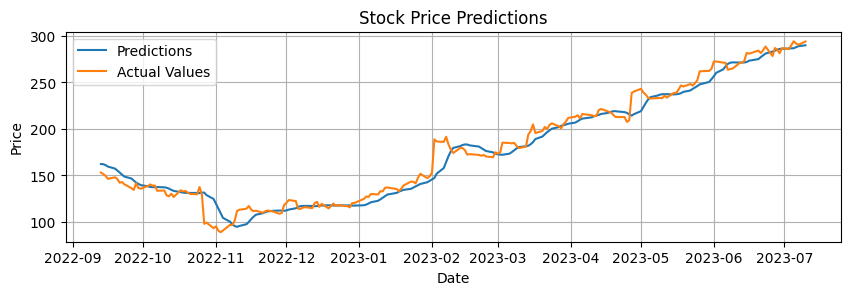

In [5]:
# Example usage
create_stock_prediction("META", 15)

# Stock Time Series Prediction

In [9]:
# Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import datetime

In [10]:
def create_stock_prediction(ticker, n, train_size=0.9):
    # Get the historical data for the specified ticker

    def download_stock_data(ticker):
      end_date = datetime.datetime.today().strftime('%Y-%m-%d')
      start_date = (datetime.datetime.today() - datetime.timedelta(days=1000)).strftime('%Y-%m-%d')
      data = yf.download(ticker, start=start_date, end=end_date)
      return data

    data = download_stock_data(ticker)

    # Prepare the data for LSTM
    dataset = data["Close"].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split the data into training and testing sets
    train_size = int(len(scaled_data) * train_size)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    # Create the training data sequences and their corresponding labels
    def create_sequences(data, sequence_length):
        X = []
        y = []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i+sequence_length, :])  # Update to include dimensions
            y.append(data[i+sequence_length])
        return np.array(X), np.array(y)

    sequence_length = 30
    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Update input_shape
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Inverse scale the predictions
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    # Calculate the mean squared error (MSE)
    mse = np.mean((predictions - y_test)**2)
    print("Mean Squared Error:", mse)

    # Convert the predictions and actual values to DataFrames with dates as index
    prediction_dates = data.index[train_size + sequence_length:]
    predictions_df = pd.DataFrame(predictions, index=prediction_dates, columns=["Prediction"])
    y_test_df = pd.DataFrame(y_test, index=prediction_dates, columns=["Actual"])

    # Function to plot the results
    def plot_predictions(prediction_dates, predictions, actual_values, n):
        plt.figure(figsize=(10, 6))

        # Plot the actual values
        plt.plot(prediction_dates, actual_values, label='Actual Values')

        # Plot the predictions for the available data
        plt.plot(prediction_dates, predictions, label='Predictions')

        # Plot the future predictions (the ones that don't exist in the dataset)
        future_dates = pd.date_range(start=prediction_dates[-1], periods=n, freq=data.index.inferred_freq)
        future_predictions = []

        last_sequence = X_test[-1:, :, :]
        for _ in range(n):
            next_prediction = model.predict(last_sequence)
            future_predictions.append(next_prediction[0, 0])
            last_sequence = np.concatenate((last_sequence[:, 1:, :], np.expand_dims(next_prediction, axis=1)), axis=1)

        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
        future_dates = pd.date_range(start=prediction_dates[-1], periods=n, freq=data.index.inferred_freq)
        plt.plot(future_dates, future_predictions, label='Future Predictions')

        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Stock Price Predictions')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Print the next n predicted values
        next_prediction_dates = future_dates[:n]
        next_predictions = future_predictions[:n]
        next_predictions_df = pd.DataFrame(next_predictions, index=next_prediction_dates, columns=["Next Predictions"])
        print(next_predictions_df)

    plot_predictions(prediction_dates, predictions, y_test, n)

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
19/19 [==============================] - 6s 32ms/step - loss: 0.0435
Epoch 2/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0085
Epoch 3/10
19/19 [==============================] - 1s 32ms/step - loss: 0.0055
Epoch 4/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0049
Epoch 5/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0045
Epoch 6/10
19/19 [==============================] - 1s 32ms/step - loss: 0.0043
Epoch 7/10
19/19 [==============================] - 1s 32ms/step - loss: 0.0040
Epoch 8/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0039
Epoch 9/10
19/19 [==============================] - 1s 33ms/step - loss: 0.0037
Epoch 10/10
2/2 [==============================] - 1s 11ms/step
Mean Squared Error: 6.697311943629758
1/1 [==============================] - 0s 28ms/step


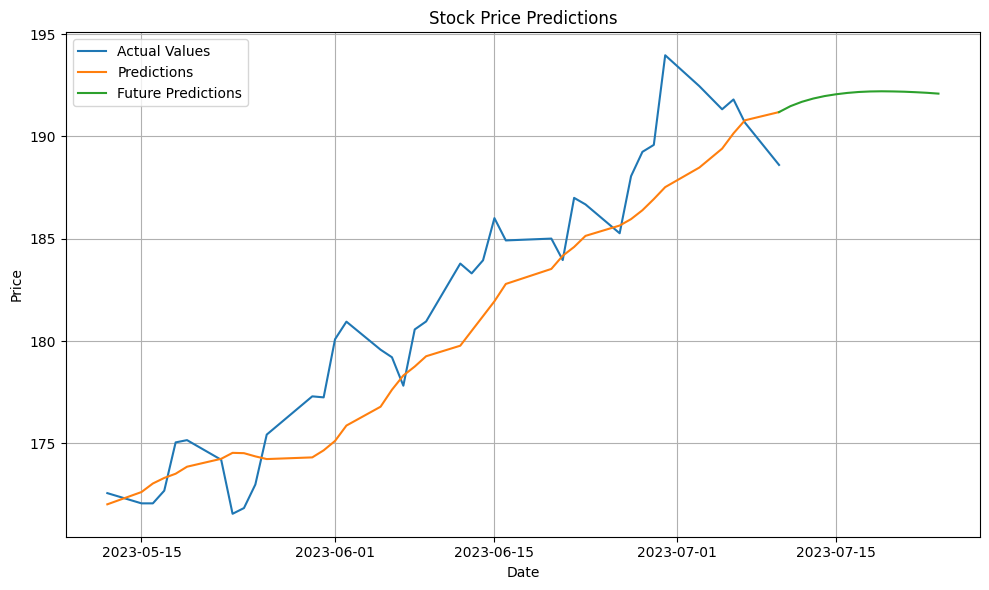

            Next Predictions
2023-07-10        191.193344
2023-07-11        191.482513
2023-07-12        191.694458
2023-07-13        191.854294
2023-07-14        191.975052
2023-07-15        192.062729
2023-07-16        192.129410
2023-07-17        192.175446
2023-07-18        192.200363
2023-07-19        192.209183
2023-07-20        192.202133
2023-07-21        192.188507
2023-07-22        192.164307
2023-07-23        192.135101
2023-07-24        192.095245


In [11]:
# Example usage
create_stock_prediction("AAPL", 15)

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
19/19 [==============================] - 5s 30ms/step - loss: 0.0507
Epoch 2/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0084
Epoch 3/10
19/19 [==============================] - 1s 32ms/step - loss: 0.0054
Epoch 4/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0049
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 0.0047
Epoch 6/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0045
Epoch 7/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0044
Epoch 8/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0042
Epoch 9/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0041
Epoch 10/10
2/2 [==============================] - 1s 10ms/step
Mean Squared Error: 70.19396321960272
1/1 [==============================] - 0s 41ms/step


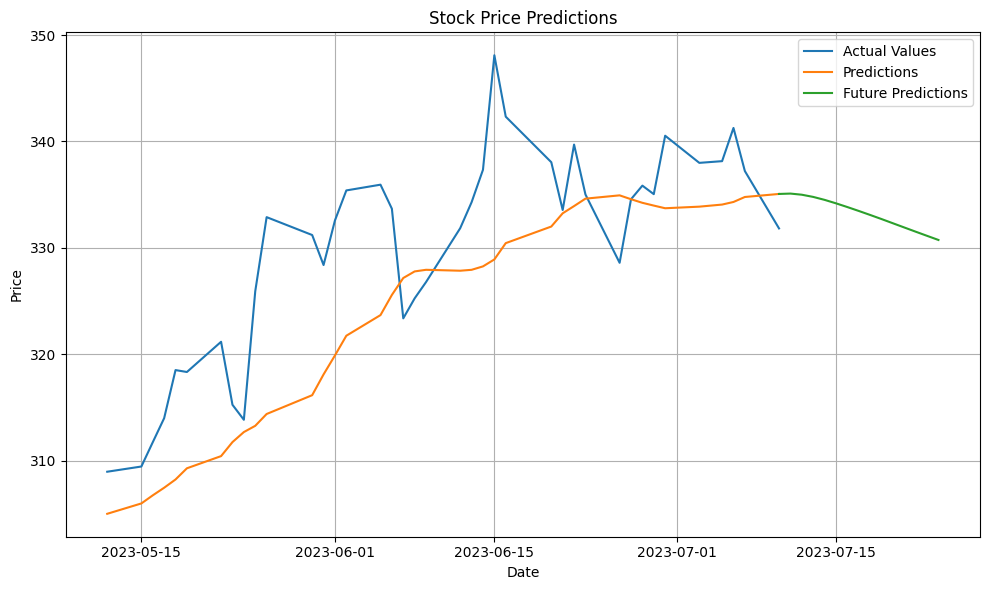

            Next Predictions
2023-07-10        335.068939
2023-07-11        335.103943
2023-07-12        334.997101
2023-07-13        334.791199
2023-07-14        334.513641
2023-07-15        334.188477
2023-07-16        333.838348
2023-07-17        333.472595
2023-07-18        333.096252
2023-07-19        332.711456
2023-07-20        332.314789
2023-07-21        331.919037
2023-07-22        331.524170
2023-07-23        331.133575
2023-07-24        330.744995


In [12]:
# Example usage
create_stock_prediction("MSFT", 15)

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
19/19 [==============================] - 5s 30ms/step - loss: 0.0758
Epoch 2/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0115
Epoch 3/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0070
Epoch 4/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0055
Epoch 5/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0051
Epoch 6/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0048
Epoch 7/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0044
Epoch 8/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0042
Epoch 9/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0045
Epoch 10/10
2/2 [==============================] - 1s 16ms/step
Mean Squared Error: 11.206198093388819
1/1 [==============================] - 0s 39ms/step


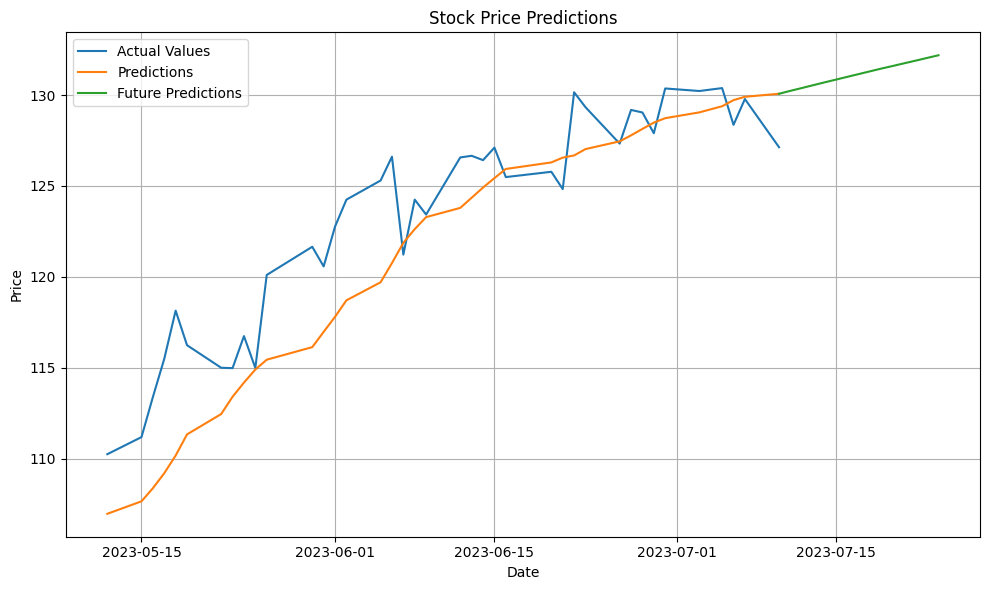

            Next Predictions
2023-07-10        130.069153
2023-07-11        130.230499
2023-07-12        130.383331
2023-07-13        130.540329
2023-07-14        130.695999
2023-07-15        130.846970
2023-07-16        130.999176
2023-07-17        131.151520
2023-07-18        131.303467
2023-07-19        131.455658
2023-07-20        131.597839
2023-07-21        131.744476
2023-07-22        131.888855
2023-07-23        132.037430
2023-07-24        132.184891


In [13]:
# Example usage
create_stock_prediction("AMZN", 15)